### Trees and graphs

### So the basic binary tree comes in a few variants:
##### Binary search tree: A tree where each node to the left of the root is smaller, and each to the right of the root is larger. Each child node on the left is smaller than the parent and each child on the right is larger than the parent
    
##### Complete binary tree: A tree where each layer is fully occupied, having been filled from left to right. Ordering of node contents irrelevant

##### Full binary tree: A tree where each node has either zero or two children

##### Perfect binary tree: A binary tree that's both full and complete

In [10]:
# Need to make a node class that will act as the constituents of the tree
class Node:
    def __init__(self, data=None):
        self.data = data
        self.leftChild = None
        self.rightChild = None


# Need a tree class that will wrap the nodes
class Tree:
    def __init__(self):
        self.root = None
    
    def insert(self, data):
        if self.root is None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)
    
    def _insert(self, data, node):  # Insert some data passing a reference to the current node to enable recursion
        if data < node.data:
            if node.leftChild is not None:  # If there's already a leaf there
                self._insert(data, node.leftChild)
            else:
                node.leftChild = Node(data)
        else:
            if node.rightChild is not None:
                self._insert(data, node.rightChild)
            else:
                node.rightChild = Node(data)


t = Tree()
t.insert(123)
t.insert(50)
t.insert(25)
print(t.root.data)
print(t.root.leftChild.data)


123
50


### Useful to recursively insert values into the tree so you don't have to keep track of layers of inserted nodes

### Oh no! You want the whole tree printed out with a given traversal method?

In [49]:
# Start with root
t1 = Tree()
t1.insert(10)
print('root = ' + str(t1.root.data))

# Add a few other nodes and leaves
t1.insert(1)
t1.insert(3)
t1.insert(5)
t1.insert(7)
t1.insert(9)
t1.insert(11)
t1.insert(13)
t1.insert(15)
t1.insert(17)
t1.insert(19)

print('Root left child = ' + str(t1.root.leftChild.data))
print('Root right child = ' + str(t1.root.rightChild.data))

root = 10
Root left child = 1
Root right child = 11


### Want to make a traversal method to walk through the nodes recursively and print their values.

### Start with inorder traversal: (Left child, Parent node, Right child)

In [50]:
node = t1.root
def printNodeCluster(node):
    if node.leftChild is not None:
        printNodeCluster(node.leftChild)
    else:
        print(node.data)
    
    if node.rightChild is not None:
        printNodeCluster(node.rightChild)
    else:
        print(node.data)

printNodeCluster(node)
# Hmmm

1
3
5
7
9
9
11
13
15
17
19
19


In [51]:
# Make as a cleaned up compact function

def inorderTraversal(root):
    res = []
    if root:
        res = inorderTraversal(root.leftChild)  # Recursive call
        res.append(root.data)
        res = res + inorderTraversal(root.rightChild)
    return res

inorderTraversal(t1.root)

[1, 3, 5, 7, 9, 10, 11, 13, 15, 17, 19]

In [72]:
# Another quick example
t2 = Tree()
t2.insert('d')  # Root
t2.insert('a')  # Should go to the left
t2.insert('b')  # Left
t2.insert('c')  # Left
t2.insert('e')  # Right
t2.insert('f')  # Right
t2.insert('g')  # Right

print('In order traversal: {}'.format(inorderTraversal(t2.root)))  # Alphabetically ordered despite input ordering (as desired)
print('Nodes around root (Inorder): {}'.format([t2.root.leftChild.data, t2.root.data, t2.root.rightChild.data]))

In order traversal: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
Nodes around root (Inorder): ['a', 'd', 'e']


### Oh no! You want to do breadth first traversal of a tree? Looks like you need an adjacency list first, where the adjacency list is either an array of linked lists or a dictionary of edges and connected vertices. We'll make a linked list class first because I like them

In [1]:
# Nodes for the linked list
class ListNode:
    def __init__(self, data=None):
        if data is not None:
            self.data = data
        else:
            self.data = None
        self.next = None


# Linked list class
class LinkedList:
    
    # Initialise list with data if it's given
    def __init__(self, data=None):
        # Assuming data is passed as an array of strings or something
        self.head = None
        
        if data is not None:
            node = ListNode(data.pop(0))
            self.head = node
            
            for entry in data:  # Note that data will be missing it's first element here as it was popped off in the line above
                node.next = ListNode(entry)
                node = node.next
    
    def __repr__(self):
        # Walk through the list, record the data at each node and print it out nicely
        data = []
        node = self.head
        while node is not None:
            data.append(node.data)
            node = node.next
        data.append('None')
        
        # Check data type of the input data and format accordingly
        if type(data[0]) == str:
            return ' -> '.join(data)
        elif type(data[0]) in [float, int]:
            return ' -> '.join(list(map(str, data)))
        else:
            return 'Data type is messed up. Check input type'
    
    def __iter__(self):
        node = self.head
        while node is not None:
            yield node
            node = node.next

### Now that we've got a linked list class, we can build the adjacency list for a given tree - see the example undirectedGraph.jpg in github/dataStructures, replicated here for convenience

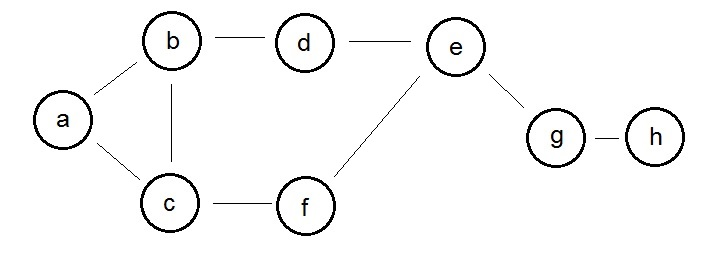

In [2]:
# By inspecting the graph, the adjacency list as an array of linked lists is:
numberOfNodes = 8
adj = [None]*numberOfNodes

# Index 0 of adjacency list will be the nodes connected directly to node 'a' etc
adj[0] = LinkedList(['b', 'c'])
adj[1] = LinkedList(['a', 'c', 'd'])
adj[2] = LinkedList(['a', 'b', 'f'])
adj[3] = LinkedList(['b', 'e'])
adj[4] = LinkedList(['d', 'f', 'g'])
adj[5] = LinkedList(['c', 'e'])
adj[6] = LinkedList(['e', 'h'])
adj[7] = LinkedList(['g'])
print('Linked list representation:')
for ll in adj:
    print(ll)

Linked list representation:
b -> c -> None
a -> c -> d -> None
a -> b -> f -> None
b -> e -> None
d -> f -> g -> None
c -> e -> None
e -> h -> None
g -> None


In [4]:
# We can also represent a graph as a dictionary of {edges: Connected vertices}
graph = {'a': ['b', 'c'],
         'b': ['a', 'c', 'd'],
         'c': ['a', 'b', 'f'],
         'd': ['b', 'e'],
         'e': ['d', 'f', 'g'],
         'f': ['c', 'e'],
         'g': ['e', 'h'],
         'h': ['g']
        }
print('Dictionary of edges and vertices representation:')
graph

Dictionary of edges and vertices representation:


{'a': ['b', 'c'],
 'b': ['a', 'c', 'd'],
 'c': ['a', 'b', 'f'],
 'd': ['b', 'e'],
 'e': ['d', 'f', 'g'],
 'f': ['c', 'e'],
 'g': ['e', 'h'],
 'h': ['g']}

### With these representations in hand, we can do the breadth first search from a given node:

In [15]:
# Inputs are s: root node and adj: adjacency list
def breadthFirstSearch(s, adj):
    level = {s: 0}
    parent = {s: None}
    i = 1
    frontier = [s]
    while frontier:
        print(frontier)
        next = []
        for u in frontier:
            for v in adj[u]:
                if v not in level:
                    level[v] = i
                    parent[v] = u
                    next.append(v)
        frontier = next
        i += 1
    return parent

In [18]:
# Call the above function which will print the next layer of nodes on a breadth first basis starting from arg1

# So starting from node 'd' in undirectedGraph.jpg...
parentStructure = breadthFirstSearch('d', graph)
# ... Level 0 is node 'd' itself
# the first layer out (reachable by only one edge) includes nodes 'b' and 'e'
# the second layer out includes nodes 'a', 'c', 'f' and 'g'
# whilst the final layer is only node 'h'

['d']
['b', 'e']
['a', 'c', 'f', 'g']
['h']


In [19]:
parentStructure

{'d': None,
 'b': 'd',
 'e': 'd',
 'a': 'b',
 'c': 'b',
 'f': 'e',
 'g': 'e',
 'h': 'g'}

### The parent structure gives you a shortest (Not necessarily unique, but it will be one of the shortest) path from a given node back to the parent that you started the search from.

### For example, in the above, starting from node 'g', the immediate parent is 'e', which has a parent of 'd', the starting node. In other words, a shortest path from 'g' to 'd' is 'g' -> 'e' -> 'd'